In [1]:
from lppls import lppls
import yfinance as yf
import numpy as np
import pandas as pd
from datetime import datetime as dt
%matplotlib inline

In [2]:
# Download S&P 500 historical data
data = yf.download('TDEX.BK', start='2024-08-01', progress=False)

In [3]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-08-01,8.14,8.18,8.11,8.12,8.12,463300
2024-08-02,8.12,8.12,8.12,8.12,8.12,0
2024-08-05,8.03,8.03,7.86,7.89,7.89,1700700
2024-08-06,7.97,7.99,7.89,7.89,7.89,595700
2024-08-07,7.91,8.00,7.91,7.95,7.95,278600


In [4]:
# convert time to ordinal
time = [pd.Timestamp.toordinal(t1) for t1 in data.index]

In [5]:
time[:10]

[739099,
 739100,
 739103,
 739104,
 739105,
 739106,
 739107,
 739111,
 739112,
 739113]

In [6]:
# create list of observation data
price = np.log(data['Adj Close'].values)

In [7]:
price[:10]

array([2.09433014, 2.09433014, 2.06559612, 2.06559612, 2.0731719 ,
       2.0731719 , 2.08069079, 2.08567212, 2.08193848, 2.08193848])

In [8]:
# create observations array (expected format for LPPLS observations)
observations = np.array([time, price])

In [9]:
observations.shape

(2, 54)

In [10]:
from lppls import lppls_cmaes

In [12]:
lppls_model = lppls_cmaes.LPPLSCMAES(observations=observations)
tc, m, w, a, b, c, c1, c2, O, D = lppls_model.fit(max_iteration=4000, pop_size=4, factor_sigma=0.0001)

(80_w,160)-aCMA-ES (mu_w=42.4,w_1=5%) in dimension 3 (seed=308469, Thu Oct 17 18:45:45 2024)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1    160 8.758464470425865e-03 1.0e+00 1.07e+00  1e-04  1e+02 0:00.0
    2    320 8.073221951671252e-03 1.9e+00 1.01e+00  1e-04  2e+02 0:00.1
    3    480 7.442172135535058e-03 4.0e+00 1.09e+00  1e-04  4e+02 0:00.1
   21   3360 2.474326950289971e-03 3.1e+03 1.82e+02  1e-01  4e+01 0:00.8


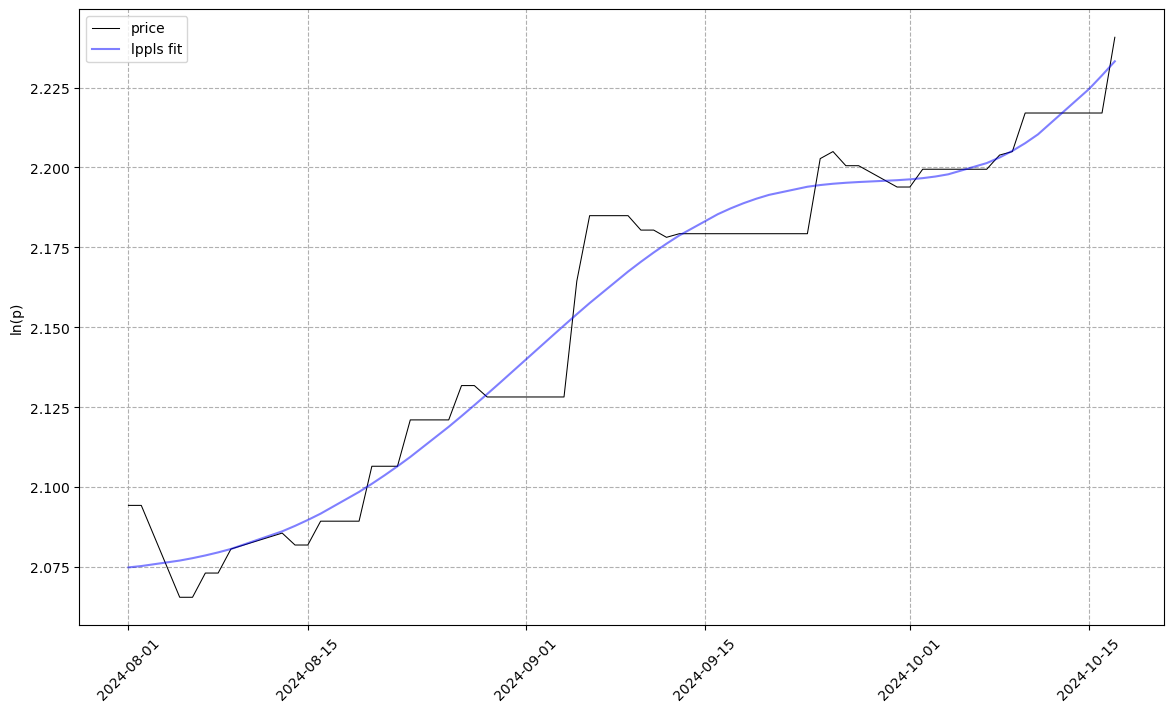

In [13]:
# visualize the fit
lppls_model.plot_fit()

In [14]:
pd.Timestamp.fromordinal(int(tc))

Timestamp('2024-12-06 00:00:00')